In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\healthcare_dataset.csv")
df

,PatientID,Name,Age,Gender,Address,City,State,ZipCode,ContactNumber,Email,Disease,AdmissionDate,DischargeDate,DoctorAssigned,TreatmentCost
0,PID00001,Patient 1,52,Male,Address 1,CityA,StateX,71591,9883959691,patient1@example.com,DiseaseB,5/22/2021,5/10/2023,Dr. A,38578
1,PID00002,Patient 2,93,Female,Address 2,CityA,StateX,14638,9894545781,patient2@example.com,DiseaseA,2/4/2021,7/20/2021,Dr. B,28935
2,PID00003,Patient 3,15,Female,Address 3,CityB,StateY,34119,9817523973,patient3@example.com,DiseaseB,3/12/2023,NaN,Dr. A,94550
3,PID00004,Patient 4,72,Male,Address 4,CityD,StateY,29601,9835849079,patient4@example.com,DiseaseB,3/7/2023,12/14/2022,Dr. C,72062
4,PID00005,Patient 5,61,Female,Address 5,CityA,StateX,63576,9822174408,patient5@example.com,DiseaseA,1/17/2021,5/24/2022,Dr. B,92560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PID49996,Patient 49996,9,Female,NaN,CityA,StateX,37260,9877735830,patient49996@example.com,DiseaseD,8/27/2020,5/26/2020,Dr. B,54295
49996,PID49997,Patient 49997,88,Female,Address 49997,CityD,NaN,99902,9875902402,patient49997@example.com,DiseaseA,2/22/2023,9/12/2021,Dr. D,93245
49997,PID49998,Patient 49998,48,Female,Address 49998,CityB,StateY,19212,9841607585,patient49998@example.com,DiseaseA,9/3/2023,2/28/2020,Dr. D,83207
49998,PID49999,Patient 49999,39,Female,Address 49999,CityC,StateZ,25569,9820183577,patient49999@example.com,DiseaseB,9/5/2021,9/10/2023,Dr. A,27092


In [5]:
df.isnull().sum()

PatientID            0
Name                 0
Age                  0
Gender            5000
Address           5000
City                 0
State             5000
ZipCode              0
ContactNumber        0
Email             5000
Disease              0
AdmissionDate        0
DischargeDate     5000
DoctorAssigned       0
TreatmentCost        0
dtype: int64

In [7]:
df.describe()

,Age,ZipCode,ContactNumber,TreatmentCost
count,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,49.970980,54890.947700,9.854945e+09,50467.287380
std,28.554931,25947.698463,2.607831e+07,28559.235539
min,1.000000,10001.000000,9.810001e+09,1010.000000
25%,25.000000,32395.250000,9.832282e+09,25719.750000
50%,50.000000,54726.500000,9.855079e+09,50619.500000
75%,75.000000,77380.500000,9.877618e+09,75027.000000
max,99.000000,99998.000000,9.899998e+09,99997.000000


# Demographic Analysis:

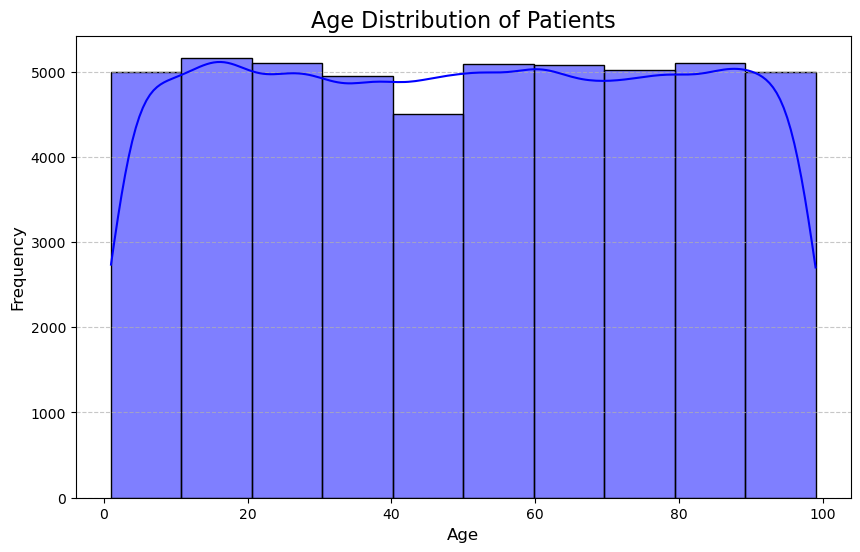

In [8]:
#Q1) What is the age distribution of the patients?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Gender Distribution (Counts):
Gender
Female    22640
Male      22360
NaN        5000
Name: count, dtype: int64

Gender Distribution (Percentages):
Gender
Female    45.28
Male      44.72
NaN       10.00
Name: count, dtype: float64


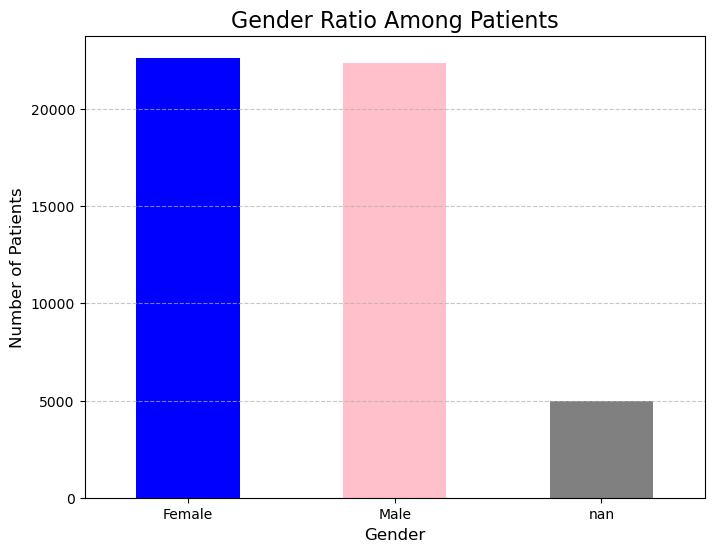

In [9]:
#Q2) What is the gender ratio among patients in the dataset?
# Calculate the gender distribution
gender_counts = df['Gender'].value_counts(dropna=False)  # Includes missing/NaN values
gender_percentages = (gender_counts / len(df)) * 100  # Calculate percentages

# Display gender counts and percentages
print("Gender Distribution (Counts):")
print(gender_counts)
print("\nGender Distribution (Percentages):")
print(gender_percentages)

# Plot the gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink', 'gray'])
plt.title('Gender Ratio Among Patients', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The city contributing the most patients is CityA with 12614 patients.
The state contributing the most patients is StateX with 15092 patients.


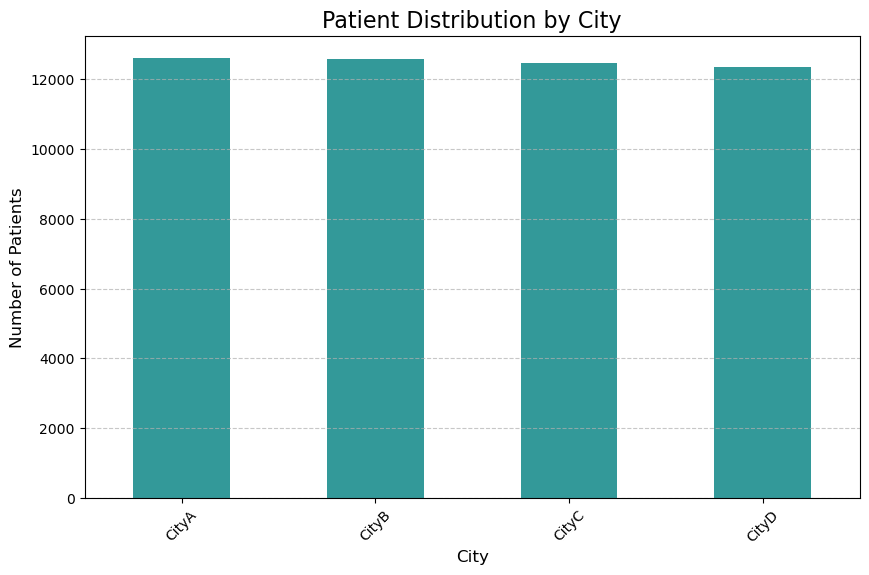

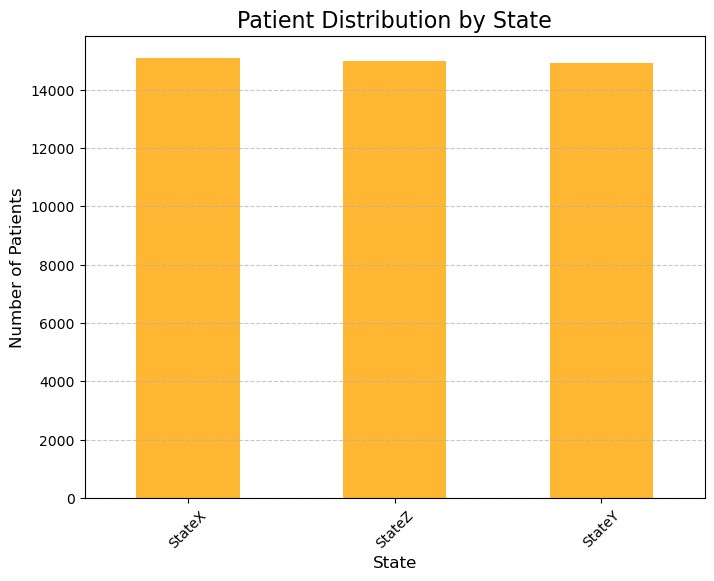

In [10]:
#Q3) Which city and state contribute the most patients to the hospital?
# Calculate patient distribution by City
city_counts = df['City'].value_counts()
most_common_city = city_counts.idxmax()  # City with the highest count
most_common_city_count = city_counts.max()

# Calculate patient distribution by State
state_counts = df['State'].value_counts()
most_common_state = state_counts.idxmax()  # State with the highest count
most_common_state_count = state_counts.max()

# Print results
print(f"The city contributing the most patients is {most_common_city} with {most_common_city_count} patients.")
print(f"The state contributing the most patients is {most_common_state} with {most_common_state_count} patients.")

# Visualize patient distribution by City
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Patient Distribution by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize patient distribution by State
plt.figure(figsize=(8, 6))
state_counts.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Patient Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Disease and Admission Trends:

The most common disease is: DiseaseB
It occurs in 12624 patients.


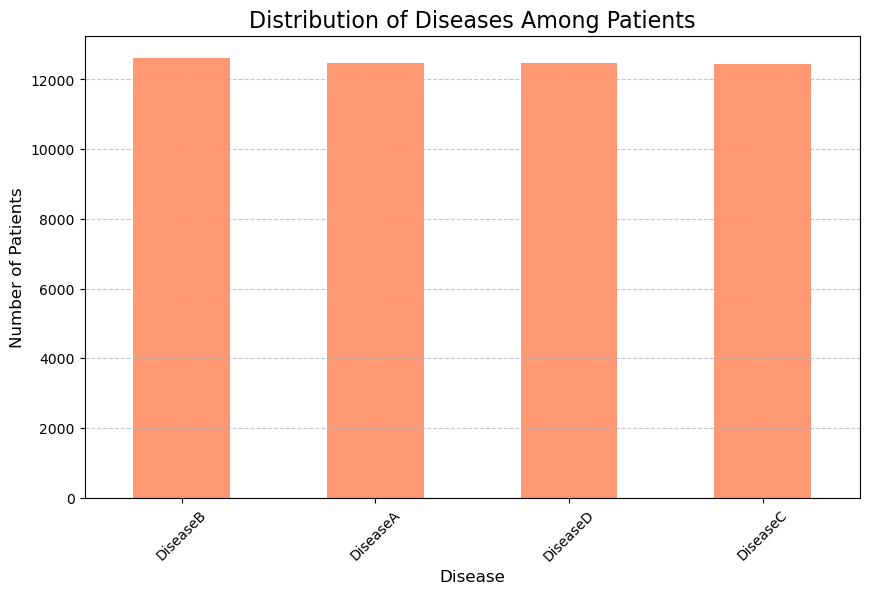

In [11]:
#Q4) What are the most common diseases among patients?
# Calculate the frequency of each disease
disease_counts = df['Disease'].value_counts()

# Find the most common disease
most_common_disease = disease_counts.idxmax()
most_common_disease_count = disease_counts.max()

# Print results
print("The most common disease is:", most_common_disease)
print(f"It occurs in {most_common_disease_count} patients.")

# Visualize the frequency of diseases
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar', color='coral', alpha=0.8)
plt.title('Distribution of Diseases Among Patients', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


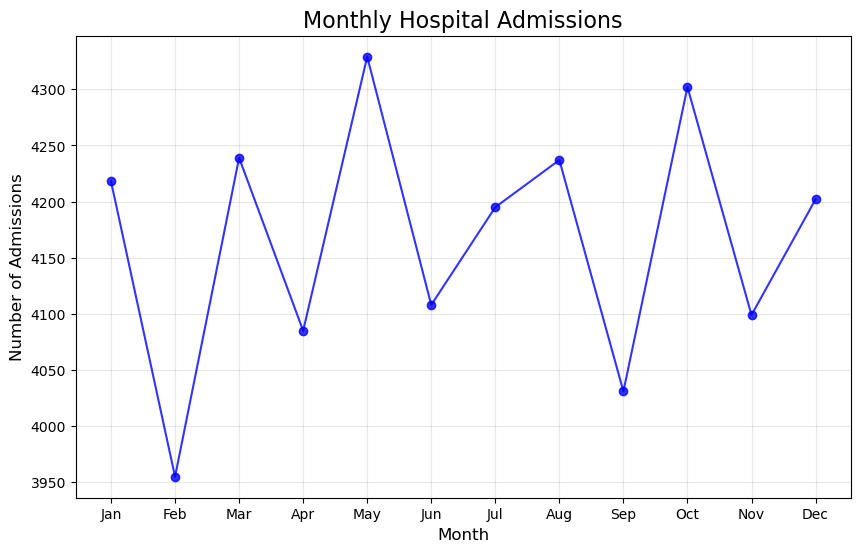

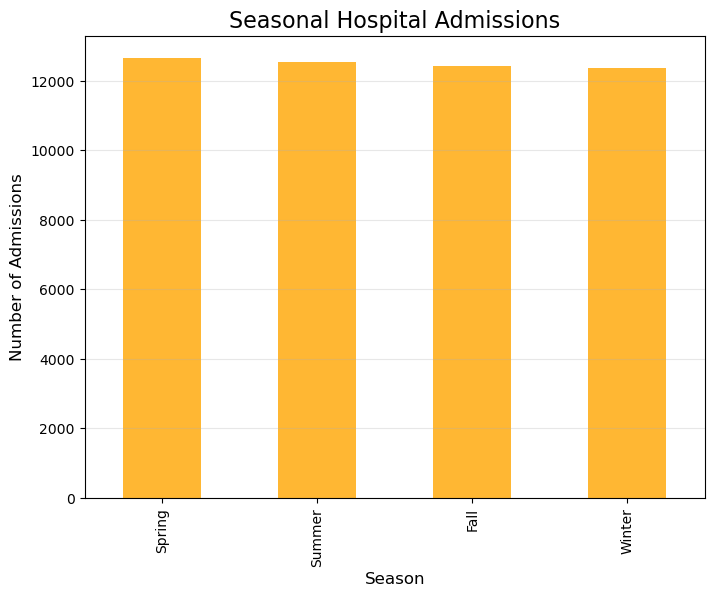

In [12]:
#Q5) Are there seasonal trends in disease prevalence or hospital admissions?
Convert AdmissionDate to datetime
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'], errors='coerce')

# Extract month and season
df['AdmissionMonth'] = df['AdmissionDate'].dt.month
df['Season'] = df['AdmissionDate'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Count admissions by month
monthly_admissions = df['AdmissionMonth'].value_counts().sort_index()

# Count admissions by season
seasonal_admissions = df['Season'].value_counts()

# Plot monthly admissions
plt.figure(figsize=(10, 6))
monthly_admissions.plot(kind='line', marker='o', color='blue', alpha=0.8)
plt.title('Monthly Hospital Admissions', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.3)
plt.show()

# Plot seasonal admissions
plt.figure(figsize=(8, 6))
seasonal_admissions.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Seasonal Hospital Admissions', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


Average Hospital Stay by Disease:
Disease
DiseaseC    3.575146
DiseaseD    3.147266
DiseaseA    0.885564
DiseaseB   -8.625843
Name: HospitalStay, dtype: float64


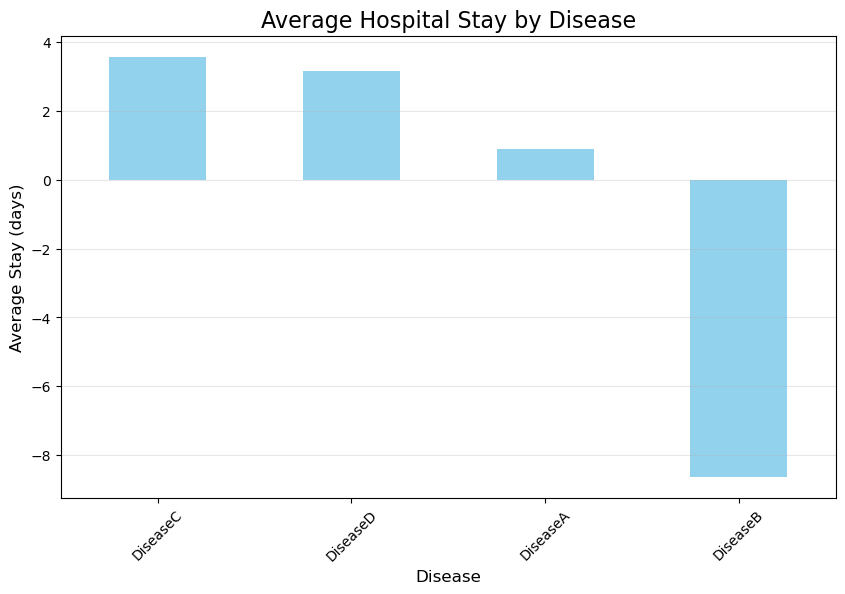

In [13]:
#Q6) Which diseases result in the longest average hospital stay?
# Convert AdmissionDate and DischargeDate to datetime
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'], errors='coerce')
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'], errors='coerce')

# Calculate hospital stay in days
df['HospitalStay'] = (df['DischargeDate'] - df['AdmissionDate']).dt.days

# Handle missing discharge dates (exclude them or fill with 0)
df = df.dropna(subset=['HospitalStay'])  # Exclude rows with missing stay duration

# Group by Disease and calculate average hospital stay
avg_stay_by_disease = df.groupby('Disease')['HospitalStay'].mean().sort_values(ascending=False)

# Display results
print("Average Hospital Stay by Disease:")
print(avg_stay_by_disease)

# Visualize the results
plt.figure(figsize=(10, 6))
avg_stay_by_disease.plot(kind='bar', color='skyblue', alpha=0.9)
plt.title('Average Hospital Stay by Disease', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Average Stay (days)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()


# Treatment and Cost Analysis:

Treatment Cost Summary Across Diseases:
            count          mean           std     min      25%      50%  \
Disease                                                                   
DiseaseA  11229.0  50308.488467  28678.446701  1037.0  25318.0  50190.0   
DiseaseB  11415.0  50716.061936  28560.006385  1010.0  26168.0  50817.0   
DiseaseC  11145.0  50347.469358  28530.630392  1014.0  25720.0  50447.0   
DiseaseD  11211.0  50256.664615  28381.057029  1015.0  25546.5  50368.0   

              75%      max  
Disease                     
DiseaseA  74810.0  99978.0  
DiseaseB  75425.5  99997.0  
DiseaseC  74719.0  99994.0  
DiseaseD  74753.5  99985.0  


C:\Users\Dell\AppData\Local\Temp\ipykernel_6968\3083606673.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease', y='TreatmentCost', data=df, palette='Set2')


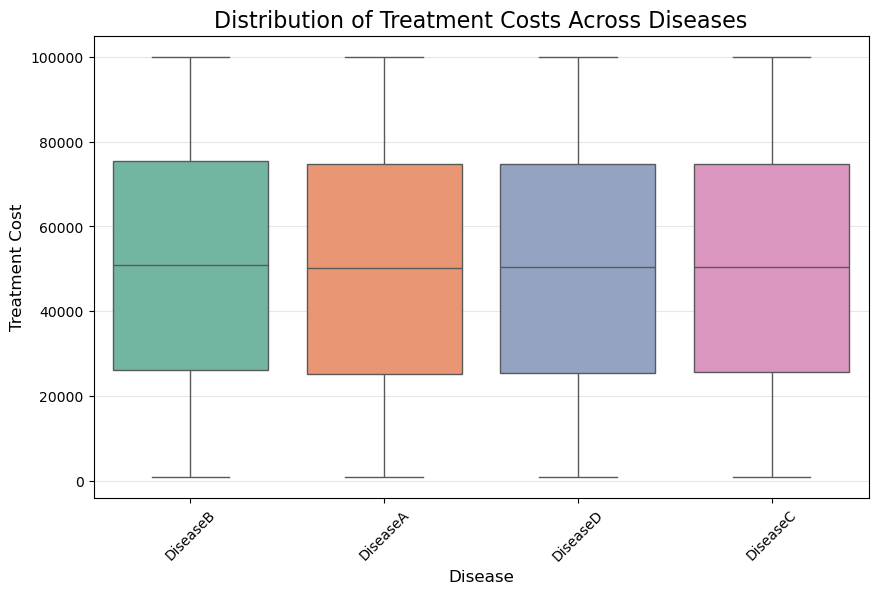

In [14]:
#Q7) What is the distribution of treatment costs across diseases?
# Group by Disease and calculate treatment cost statistics
treatment_cost_summary = df.groupby('Disease')['TreatmentCost'].describe()

# Display summary statistics
print("Treatment Cost Summary Across Diseases:")
print(treatment_cost_summary)

# Visualization: Boxplot of Treatment Costs by Disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='Disease', y='TreatmentCost', data=df, palette='Set2')
plt.title('Distribution of Treatment Costs Across Diseases', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Treatment Cost', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()


Mean Treatment Costs by Gender:
Gender
Female    50222.447616
Male      50646.409394
Name: TreatmentCost, dtype: float64
T-statistic: 1.4954120582603532
P-value: 0.13481472623109922


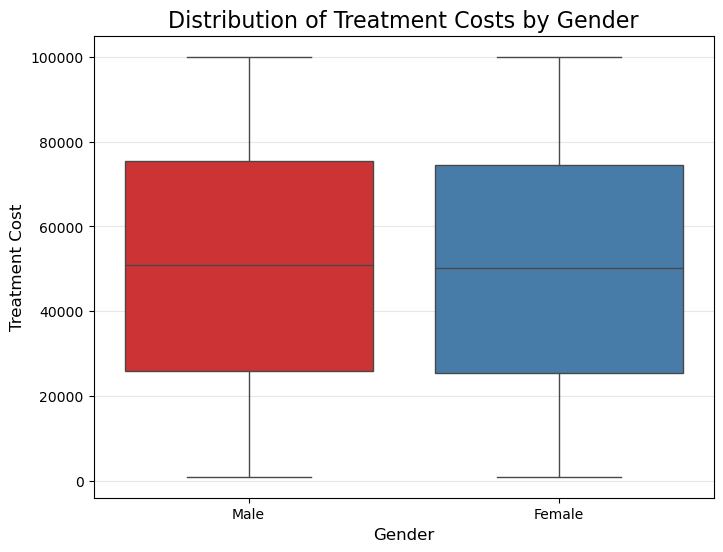

In [18]:
#Q8) Is there a significant difference in treatment costs for male vs. female patients?
from scipy import stats

# Group the dataset by Gender and calculate the mean treatment cost
gender_treatment_cost = df.groupby('Gender')['TreatmentCost'].mean()

# Display the mean treatment costs for Male and Female patients
print("Mean Treatment Costs by Gender:")
print(gender_treatment_cost)

# Perform the Independent T-test (assumes unequal variances by default)
male_treatment_costs = df[df['Gender'] == 'Male']['TreatmentCost']
female_treatment_costs = df[df['Gender'] == 'Female']['TreatmentCost']

t_stat, p_value = stats.ttest_ind(male_treatment_costs, female_treatment_costs, equal_var=False)

# Display the T-test result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Boxplot visualization of treatment costs by gender (updated)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='TreatmentCost', data=df, hue='Gender', palette='Set1', legend=False)
plt.title('Distribution of Treatment Costs by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Treatment Cost', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


DoctorAssigned
Dr. B    50483.394400
Dr. D    50449.189477
Dr. A    50424.351500
Dr. C    50277.854926
Name: TreatmentCost, dtype: float64


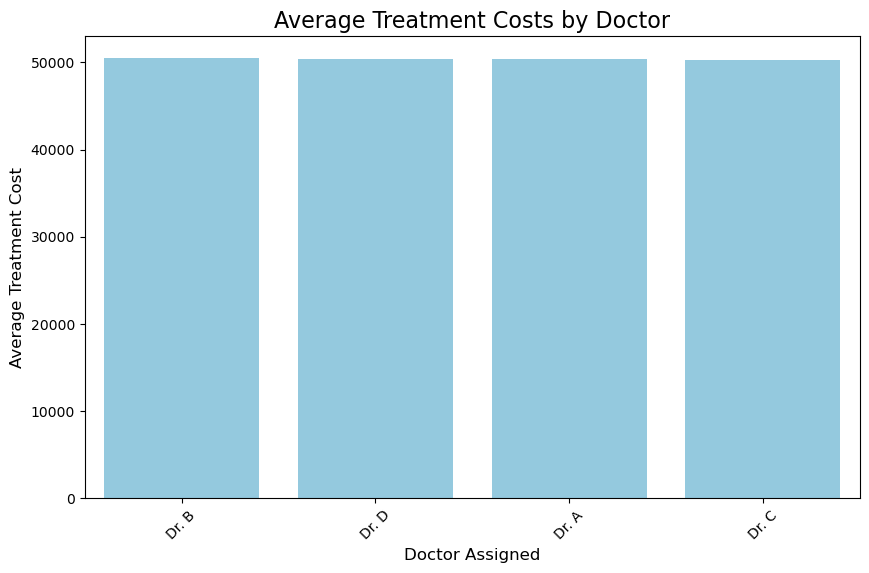

In [22]:
#Q9) Which doctors have the highest average treatment costs?
# Grouping the data by Doctor and calculating the average treatment cost for each doctor
doctor_avg_cost = df.groupby('DoctorAssigned')['TreatmentCost'].mean().sort_values(ascending=False)

# Display the doctors with the highest average treatment costs
print(doctor_avg_cost)
# Bar plot to visualize the doctors with the highest average treatment costs
plt.figure(figsize=(10, 6))
sns.barplot(x=doctor_avg_cost.index, y=doctor_avg_cost.values, color='skyblue')
plt.title('Average Treatment Costs by Doctor', fontsize=16)
plt.xlabel('Doctor Assigned', fontsize=12)
plt.ylabel('Average Treatment Cost', fontsize=12)
plt.xticks(rotation=45)
plt.show()



# Doctor Workload Analysis:

DoctorAssigned
Dr. B    11321
Dr. A    11303
Dr. C    11277
Dr. D    11099
Name: count, dtype: int64


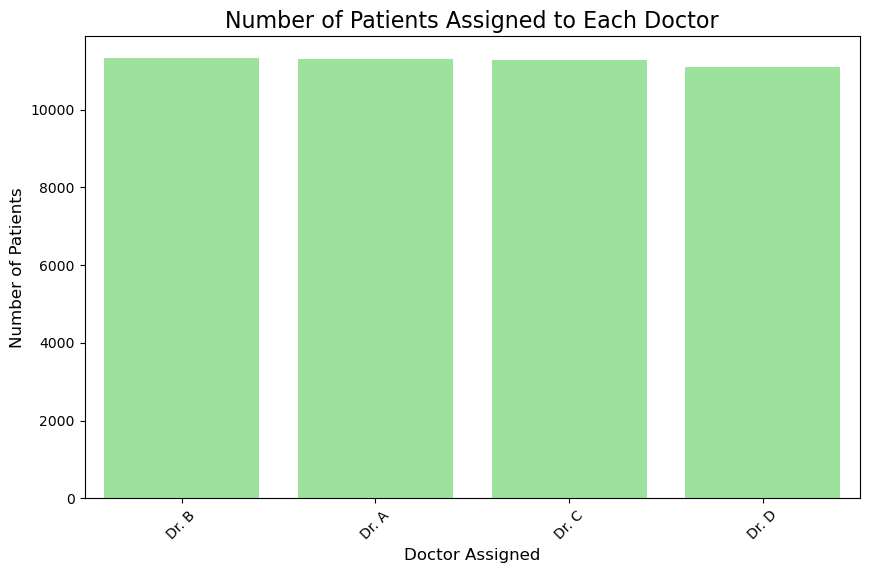

In [23]:
#Q10) How many patients are assigned to each doctor?
# Count the number of patients assigned to each doctor
doctor_patient_count = df['DoctorAssigned'].value_counts()

# Display the result
print(doctor_patient_count)

# Optional: Visualization (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=doctor_patient_count.index, y=doctor_patient_count.values, color='lightgreen')
plt.title('Number of Patients Assigned to Each Doctor', fontsize=16)
plt.xlabel('Doctor Assigned', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.show()


DoctorAssigned
Dr. B    11321
Dr. A    11303
Dr. C    11277
Dr. D    11099
Name: count, dtype: int64


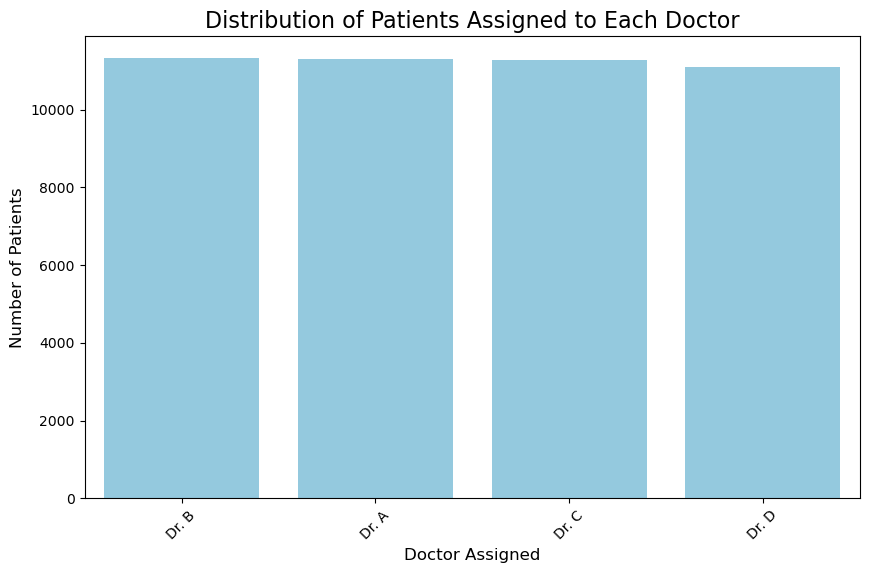

Standard Deviation of Workload: 102.27414140436477


In [24]:
#Q11) Are there disparities in the workload among doctors?
# Count the number of patients assigned to each doctor
doctor_patient_count = df['DoctorAssigned'].value_counts()

# Display the result
print(doctor_patient_count)

# Optional: Visualize the distribution of patients per doctor (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=doctor_patient_count.index, y=doctor_patient_count.values, color='skyblue')
plt.title('Distribution of Patients Assigned to Each Doctor', fontsize=16)
plt.xlabel('Doctor Assigned', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Calculate the standard deviation to assess disparity
workload_std = doctor_patient_count.std()
print(f"Standard Deviation of Workload: {workload_std}")


# Data Quality and Missing Values:

In [25]:
#Q12) Which columns have the highest proportion of missing values?
# Calculate the proportion of missing values for each column
missing_data = df.isnull().mean() * 100

# Sort the columns by the percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(ascending=False)

# Display the columns with the highest proportion of missing values
print(missing_data_sorted)


State             10.057778
Address           10.035556
Email             10.000000
Gender             9.946667
AdmissionDate      0.000000
Season             0.000000
AdmissionMonth     0.000000
TreatmentCost      0.000000
DoctorAssigned     0.000000
DischargeDate      0.000000
PatientID          0.000000
Disease            0.000000
Name               0.000000
ContactNumber      0.000000
ZipCode            0.000000
City               0.000000
Age                0.000000
HospitalStay       0.000000
dtype: float64
